
# Project: Investigate Why Do Patients Miss The Scheduled Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset being investigated is the "No-show appointments" dataset. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Variables include the scheduled date, neighborhood of the hospital, patients' Brasilian welfre enrollment,etc.
<br>
<br>***I came up with these questions:***
<br>1. Is the gap between scheduled date and appointment date one of the reasons that causes them missing the appointment?
<br>2. Is the missing appointment related with the gender?
<br>3. Is the missing appointment related with the age?
<br>4. Where are most patients who missed appointment from? Which neighbourhood?
<br>5. Are scholarship, hipertension,diabetes,alcoholism, and receiving sms related with missing appointment?
<br>6. Is handicapped level related with missing appointment?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
df=pd.read_csv("C:\\Users\\wanghe\\Desktop\\Udacity\\project 2\\appointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

There are 110527 rows and 14 columns in the dataset.

In [5]:
df.duplicated().sum()

0

There's no duplicated record in the dataset.

In [6]:
#Check how many unique values in each column.
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Names of each columns can be all lower cased.
<br>The "-" of No-show" should be replaced by "_".

In [7]:
#Check the type of each variable.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It will make more sense if the type of PatientId is integer.
<br>Types of ScheduledDay and AppointmentDay should be datetime.
<br>Types of Scholarship, Hipertension, Diabetes, Alcoholism, SMS_received, and No-show should be boolean.

In [8]:
df.isnull().sum().sum()

0

There's no missing value.

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There's a negative value of age. There's no explanation of what does -1 years old mean on the website of the dataset, but still need to be corrected.

### Data Cleaning 

1. Rename the columns.

In [10]:
#lowercase all the names.
df.columns=df.columns.str.lower()

In [11]:
#Add '_' in columns such as PatientId, AppointmentID, ScheduledDay, and ApointmentDay. 
df.rename(columns={'patientid':'patient_id','appointmentid':'appointment_id','scheduledday':'scheduled_day','appointmentday':'appointment_day'},inplace=True)
#Replace the "-" in "no-show" with "_"
df.rename(columns={'no-show':'no_show'},inplace=True)
#Check
df.head(0)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


2. Change the types of certain columns.

In [12]:
#Change the type of 'patient_id' from float into integer.
df['patient_id']=df['patient_id'].astype(np.int64)
#Change the types of 'no_show','scholarship','hipertension','diabetes','alcoholism',and 'sms_received' into boolean.
df['no_show'].replace("No",False,inplace=True)
df['no_show'].replace("Yes",True,inplace=True)
df['scholarship']=df['scholarship'].astype(bool)
df['hipertension']=df['hipertension'].astype(bool)
df['diabetes']=df['diabetes'].astype(bool)
df['alcoholism']=df['alcoholism'].astype(bool)
df['sms_received']=df['sms_received'].astype(bool)
#Change the types of 'scheduled_day' and 'apoointment_day' into datetime.
df['scheduled_day']=pd.to_datetime(df['scheduled_day'])
df['appointment_day']=pd.to_datetime(df['appointment_day'])
#Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns, UTC]
appointment_day    110527 non-null datetime64[ns, UTC]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null bool
hipertension       110527 non-null bool
diabetes           110527 non-null bool
alcoholism         110527 non-null bool
handcap            110527 non-null int64
sms_received       110527 non-null bool
no_show            110527 non-null bool
dtypes: bool(6), datetime64[ns, UTC](2), int64(4), object(2)
memory usage: 7.4+ MB


3. I decided to change the negative ages into 0.

In [13]:
#There's only one patient who has a negative age, its index is 99832.
df.query('age<0')
df['age'][99832]=0

C:\Users\wanghe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:      Is the gap between scheduled date and appointment date one of the reasons that causes them missing the appointment?

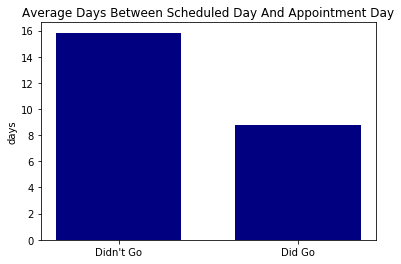

In [14]:
#Create new columns indicating the scheduled date and appointment date.
df['scheduled_date']=df['scheduled_day'].dt.date
df['appointment_date']=df['appointment_day'].dt.date
#Create subsets and separate patients who didn't come and who did come.
df_no=df.query('no_show==True')
df_yes=df.query('no_show==False')
#Calculate the gap between two dates.
diff_daten=df_no['appointment_date']-df_no['scheduled_date']
diff_datey=df_yes['appointment_date']-df_yes['scheduled_date']
#Round the gap to the units of days, and get the average of gaps of both patients who didn't go and who did go.
mean1=(diff_daten/np.timedelta64(1,'D')).mean()
mean2=(diff_datey/np.timedelta64(1,'D')).mean()
#Create a bar chart.
ind1=np.arange(2)
width1=0.7
plt.bar(ind1,[mean1,mean2],width1,color='navy');
plt.xticks(ind1,["Didn't Go","Did Go"]);
plt.ylabel('days');
plt.title('Average Days Between Scheduled Day And Appointment Day');

Let's dig the dates deeper.

In [15]:
#Get the subsets of patients whose scheduled date is the same as appointment date, and those that are not the same.
same_yes_day=df_yes.query('appointment_date == scheduled_date').shape[0]
same_no_day=df_no.query('appointment_date == scheduled_date').shape[0]
#Calculate the portion of patients who scheduled on the same date as appointment date of each subset.
same_yes_day_prop=same_yes_day/df_yes.shape[0]
same_no_day_prop=same_no_day/df_no.shape[0]
diff_yes_day_prop=1-same_yes_day_prop
diff_no_day_prop=1-same_no_day_prop

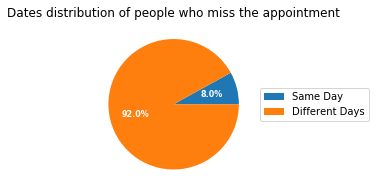

In [16]:
#Create pie charts to show the distribution of people who didn't show.
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
data=[same_no_day_prop,diff_no_day_prop]
labels=["Same Day","Different Days"]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, labels,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
plt.setp(autotexts, size=8, weight="bold");
ax.set_title("Dates distribution of people who miss the appointment");

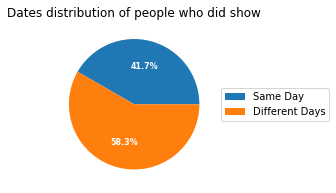

In [17]:
#Create a pie chart to show the distribution of people who did show.
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
data=[same_yes_day_prop,diff_yes_day_prop]
labels=["Same Day","Different Days"]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, labels,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
plt.setp(autotexts, size=8, weight="bold");
ax.set_title("Dates distribution of people who did show");

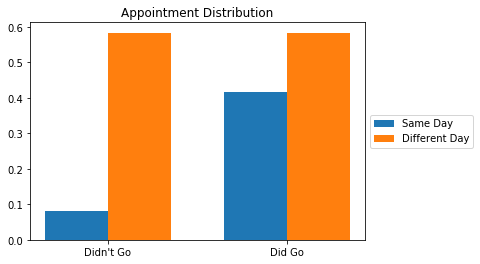

In [18]:
#Create a bar chart to show the distribution.
ind=np.arange(2)
width=0.35
location=ind+width/2
labels=["Didn't Go","Did Go"]
barN=plt.bar(ind,[same_no_day_prop,same_yes_day_prop],width,label="Same Day")
barY=plt.bar(ind+width,[diff_yes_day_prop,diff_yes_day_prop],width,label="Different Day")
plt.title("Appointment Distribution");
plt.legend(loc="center left",bbox_to_anchor=(1, 0, 0.5, 1));
plt.xticks(location, labels);

***Conclusion:*** Patients who missed the appointment on average had larger gap than those who didn't miss the appointment. Patients who scheduled appointment on the same date of the appointment date are less likely to miss the appointment.

### Research Question 2: Is the missing appointment related with the gender?

In [19]:
#Calculate the portion of female and male patients who didn't go to the appointment.
gender_no_counts=df_no['gender'].value_counts()
female_no=gender_no_counts[0]
gender_no_total=gender_no_counts.sum()
female_no_prop=female_no/gender_no_total
male_no_prop=1-female_no_prop
#Calculate the portion of female and male patients who did go the appointment.
gender_yes_counts=df_yes['gender'].value_counts()
female_yes=gender_yes_counts[0]
gender_yes_total=gender_yes_counts.sum()
female_yes_prop=female_yes/gender_yes_total
male_yes_prop=1-female_yes_prop

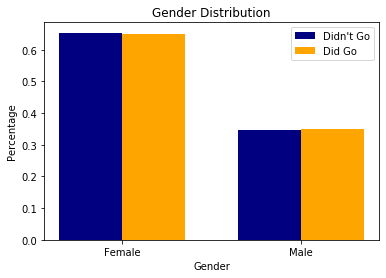

In [20]:
#Create a bar chart to show the distribution of gender of patients who didn't go and did go to the appointment.
ind2=np.arange(2)
width2=0.35
location2=ind2+width2/2
labels2=['Female','Male']
bar1_g=plt.bar(ind2,[female_no_prop,male_no_prop],width2,color="navy",label="Didn't Go")
bar2_g=plt.bar(ind2+width2,[female_yes_prop,male_yes_prop],width2,color="orange",label='Did Go')
plt.xlabel('Gender');
plt.ylabel('Percentage');
plt.title('Gender Distribution')
plt.xticks(location2,labels2);
plt.legend();

***Conclusion:*** There were more female patients than male patients. And it seems that there were only a slightly more female patients who didn't go to the appointment than those who did go. Since the difference is too small, I can say gender is not an important factor that causing missing appointments.

### Research Question 3: Is the missing appointment related with the age?

In [21]:
df['age'].describe()

count    110527.000000
mean         37.088883
std          23.110190
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [22]:
#Create a new column indicating the categories of each range of age.
df['age_range']=pd.cut(df['age'],[-1,18,37,55,115],labels=["0-18","19-37","38-55","56-115"])
#Create new subsets.
df_no=df.query('no_show==True')
df_yes=df.query('no_show==False')

In [23]:
#Calculate portion of each category of patients who didn't go to the appointment.
age_no_count=df_no['age_range'].value_counts()
age_no_total=age_no_count.sum()
age0_no_prop=age_no_count[0]/age_no_total
age1_no_prop=age_no_count[1]/age_no_total
age2_no_prop=age_no_count[2]/age_no_total
age3_no_prop=age_no_count[3]/age_no_total
#Calculate portion of each category of patients who did go to the appointment.
age_yes_count=df_yes['age_range'].value_counts()
age_yes_total=age_yes_count.sum()
age0_yes_prop=age_yes_count[0]/age_yes_total
age1_yes_prop=age_yes_count[1]/age_yes_total
age2_yes_prop=age_yes_count[2]/age_yes_total
age3_yes_prop=age_yes_count[3]/age_yes_total

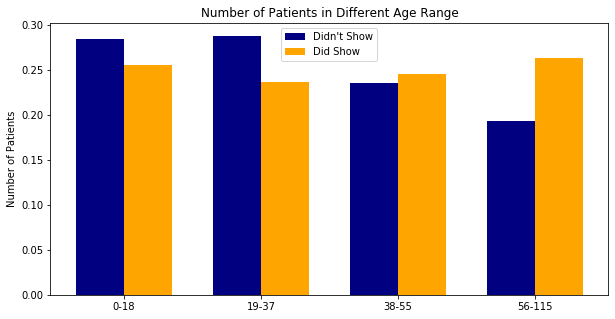

In [24]:
#Create a bar chart to show the distribution.
ind3=np.arange(4)
width3=0.35
location3=ind3+width3/2
labels3=["0-18","19-37","38-55","56-115"]
plt.subplots(figsize=(10,5));
bar1_a=plt.bar(ind3,[age0_no_prop,age1_no_prop,age2_no_prop,age3_no_prop],width3,color="navy", label="Didn't Show")
bar2_a=plt.bar(ind3+width3,[age0_yes_prop,age1_yes_prop,age2_yes_prop,age3_yes_prop],width3,color="orange",label='Did Show')
plt.ylabel('Number of Patients');
plt.title('Number of Patients in Different Age Range');
plt.xticks(location3,labels3);
plt.legend();

***Conclusion:*** Younger people who age between 0-18 and 19-37 are more likely to miss their appointments than those between age of 38-55 and 55-115.

### Research Question 4: Where are most patients who missed appointment from? Which neighbourhood?

In [25]:
#Calculate the portion of missing appointment in each neighbourhood.
df_no_neigh_count=df_no['neighbourhood'].value_counts()
df_neigh_total=df['neighbourhood'].value_counts()
df_neigh_prop=df_no_neigh_count/df_neigh_total

In [26]:
third_quant=df_neigh_prop.quantile(0.75)
most_miss=df_neigh_prop[df_neigh_prop>third_quant]
most_miss.sort_values(ascending=False)

ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289185
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.264822
ITARARÉ                        0.262664
JESUS DE NAZARETH              0.243954
HORTO                          0.240000
ILHA DO PRÍNCIPE               0.234775
CARATOÍRA                      0.230409
ANDORINHAS                     0.230327
PRAIA DO SUÁ                   0.228261
GURIGICA                       0.225966
BENTO FERREIRA                 0.224942
PARQUE MOSCOSO                 0.223192
MARUÍPE                        0.222923
DO MOSCOSO                     0.222760
ENSEADA DO SUÁ                 0.221277
ARIOVALDO FAVALESSA            0.219858
ILHA DAS CAIEIRAS              0.219421
FONTE GRANDE                   0.218475
Name: neighbourhood, dtype: float64

***Conclusion:*** Patients from these neighbourhood are more likely to miss appointments.

### Research Question 5: Are scholarship, hipertension,diabetes,alcoholism, and receiving sms related with missing appointment?

In [27]:
#Create a function to calculate the portion of each characters for patients who didn't go and did go to the appointment.
total_no_count=df_no.shape[0]
total_yes_count=df_yes.shape[0]
def get_prop(df,column,total_count):
    count=df_no[column].sum()
    return count/total_count
column=['scholarship','hipertension','diabetes','alcoholism','sms_received']
no_prop=get_prop(df_no,column,total_no_count)
yes_prop=get_prop(df_yes,column,total_yes_count)
#Combine the two series together.
prop=pd.concat([no_prop,yes_prop],axis=1,names=["Didn't go","Did go"])

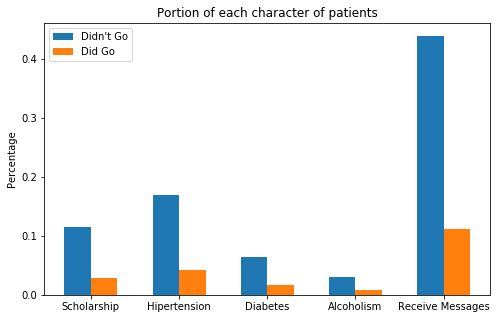

In [28]:
#Create a bar chart to show the distribution of each character.
data1=prop[0]
data2=prop[1]
ind5=np.arange(len(data1))
width5=0.3
location5=ind5+width5/2
labels5=["Scholarship","Hipertension","Diabetes","Alcoholism","Receive Messages"]
plt.subplots(figsize=(8,5))
bar1=plt.bar(ind5,prop[0],width5,label="Didn't Go")
bar2=plt.bar(ind5+width5,prop[1],width5,label="Did Go")
plt.ylabel('Percentage');
plt.title("Portion of each character of patients");
plt.legend();
plt.xticks(location5,labels5);

***Conclusion:*** Patients who have scholarship, those who have problems like hipertension, diabetes and alcoholism, and those who received messages from the hospital seem more likely to miss their appointment.<br> What the sms_received data shows seemed contractict with common sense.

### Research Question 6: Is handicapped level related with missing appointment?

In [29]:
#Calculate the portion of each handicapped level.
hand_yes_data=df.groupby('handcap')['no_show'].value_counts()[:,0]/total_yes_count
hand_no_data=df.groupby('handcap')['no_show'].value_counts()[:,1]/total_no_count

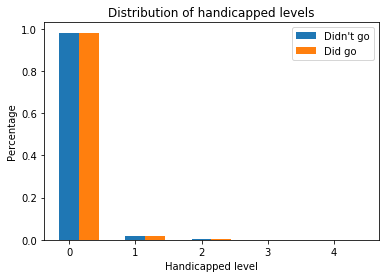

In [30]:
#Create a bar chart to show the distribution of handicapped levels
ind6=np.arange(5)
width6=0.3
location6=ind6+width6/2
labels6=[0,1,2,3,4]
bar1_h=plt.bar(ind6,hand_no_data,width6,label="Didn't go")
bar2_h=plt.bar(ind6+width6,hand_yes_data,width6,label="Did go")
plt.xlabel("Handicapped level");
plt.ylabel("Percentage");
plt.title('Distribution of handicapped levels');
plt.legend();

The bar chart above is a bit hard to observe. So, I calculated the difference between patients who didn't go and go of each level.

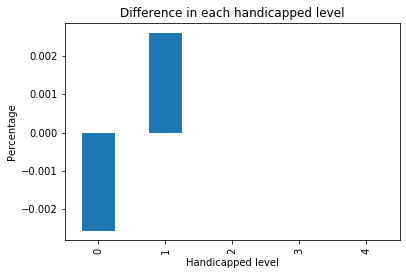

In [33]:
diff=hand_yes_data-hand_no_data
diff.plot(kind='bar');
plt.title('Difference in each handicapped level');
plt.xlabel('Handicapped level');
plt.ylabel('Percentage');

***Conclusion:*** The differences are very small, can be ignored. The handicapped level is not an important factor to consider.

<a id='conclusions'></a>
## Conclusions
>***Results:*** We can predict whether a patient will miss the appointment by:
<br>
<br>1. The gap of the scheduled date and appointment date, the larger the gap is, the more likely a patient will miss the appointment. Patients whose appointment day and scheduled day are the same have less possibility to miss the appointment.
<br>
<br>2. Patients under age of 37 are more likely to miss appointments.
<br>
<br>3. Patients from these neighbourhood are more likely to miss appointments: ILHAS OCEÂNICAS DE, TRINDADE, SANTOS DUMONT, SANTA CECÍLIA, SANTA CLARA, ITARARÉ, JESUS DE NAZARETH, HORTO, ILHA DO PRÍNCIPE, CARATOÍRA, ANDORINHAS,PRAIA DO SUÁ, GURIGICA, BENTO FERREIRA, PARQUE MOSCOSO,MARUÍPE,DO MOSCOSO,ENSEADA DO SUÁ,ARIOVALDO FAVALESSA,ILHA DAS CAIEIRAS,FONTE GRANDE.
<br>
<br>4.Patients who have scholarship, who have problems like hipertension, diabetes and alcoholism, and who have received 1+ messages from the hospital seem more likely to miss their appointment.
<br>

><br>***Limitations:*** There are a couple of limitations with our data:
<br>
<br> 1. Most of the variables are boolean, string,datetime and categorical that can't allow for a high level of statistical method that can be used to provide correlations etc.
<br>
<br> 2. The statistics used here are descriptive statistics,not inferential, meaning that we did not create any hypotheses or controlled experiments or inference with our data.
<br>
<br> 3. The negative age value could be a wrong type in. I corrected the value with 0, which is kind of subjective. This might make the result inaccurate.
<br>
<br> 4. The probabilities of missing appointment of patients coming from different neighbourhood I calculated were based on different sample size, making the result hard to compare with each other.
<br>
<br> 5. I made the age into categories,making the result less accurate.